In [143]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [144]:
df = pd.read_csv("./dataset/labeled_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7996 non-null   object 
 1   TimeStamp                 7996 non-null   object 
 2   PART_FACT_PLAN_DATE       7996 non-null   object 
 3   PART_FACT_SERIAL          7996 non-null   int64  
 4   PART_NAME                 7996 non-null   object 
 5   EQUIP_CD                  7996 non-null   object 
 6   EQUIP_NAME                7996 non-null   object 
 7   PassOrFail                7996 non-null   object 
 8   Reason                    71 non-null     object 
 9   Injection_Time            7996 non-null   float64
 10  Filling_Time              7996 non-null   float64
 11  Plasticizing_Time         7996 non-null   float64
 12  Cycle_Time                7996 non-null   float64
 13  Clamp_Close_Time          7996 non-null   float64
 14  Cushion_

In [145]:
def make_input(data, machine_name, product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_].copy()

    data.drop(["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
               "PART_NAME", "EQUIP_NAME", "EQUIP_CD",
               "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
               "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
               "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7"],
             axis=1, inplace=True)
    return data

In [146]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
"RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

cn7lh = make_input(df, machine_name, product_name[0])
cn7rh = make_input(df, machine_name, product_name[1])
rg3lh = make_input(df, machine_name, product_name[2])
rg3rh = make_input(df, machine_name, product_name[3])

cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

In [147]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   object 
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Switch_Over_Position      6736 non-null   float64
 8   Plasticizing_Position     6736 non-null   float64
 9   Clamp_Open_Position       6736 non-null   float64
 10  Max_Injection_Speed       6736 non-null   float64
 11  Max_Screw_RPM             6736 non-null   float64
 12  Average_Screw_RPM         6736 non-null   float64
 13  Max_Injection_Pressure    6736 non-null   float64
 14  Max_Swit

In [148]:
cn7["PassOrFail"] = cn7["PassOrFail"].replace('Y',0).replace('N',1)
rg3["PassOrFail"] = rg3["PassOrFail"].replace('Y',0).replace('N',1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\932499843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7["PassOrFail"] = cn7["PassOrFail"].replace('Y',0).replace('N',1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\932499843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rg3["PassOrFail"] = rg3["PassOrFail"].replace('Y',0).replace('N',1)


In [149]:
pd.set_option('display.max_columns', None)

In [150]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int64  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Switch_Over_Position      6736 non-null   float64
 8   Plasticizing_Position     6736 non-null   float64
 9   Clamp_Open_Position       6736 non-null   float64
 10  Max_Injection_Speed       6736 non-null   float64
 11  Max_Screw_RPM             6736 non-null   float64
 12  Average_Screw_RPM         6736 non-null   float64
 13  Max_Injection_Pressure    6736 non-null   float64
 14  Max_Swit

In [151]:
cn7 = cn7.drop(columns=["Switch_Over_Position"])
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,30.674674,125.583744,142.090559,136.518646,37.842132,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,0.141148,126.836972,1.985764,0.754736,1.768085,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,146.699997,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


<Axes: >

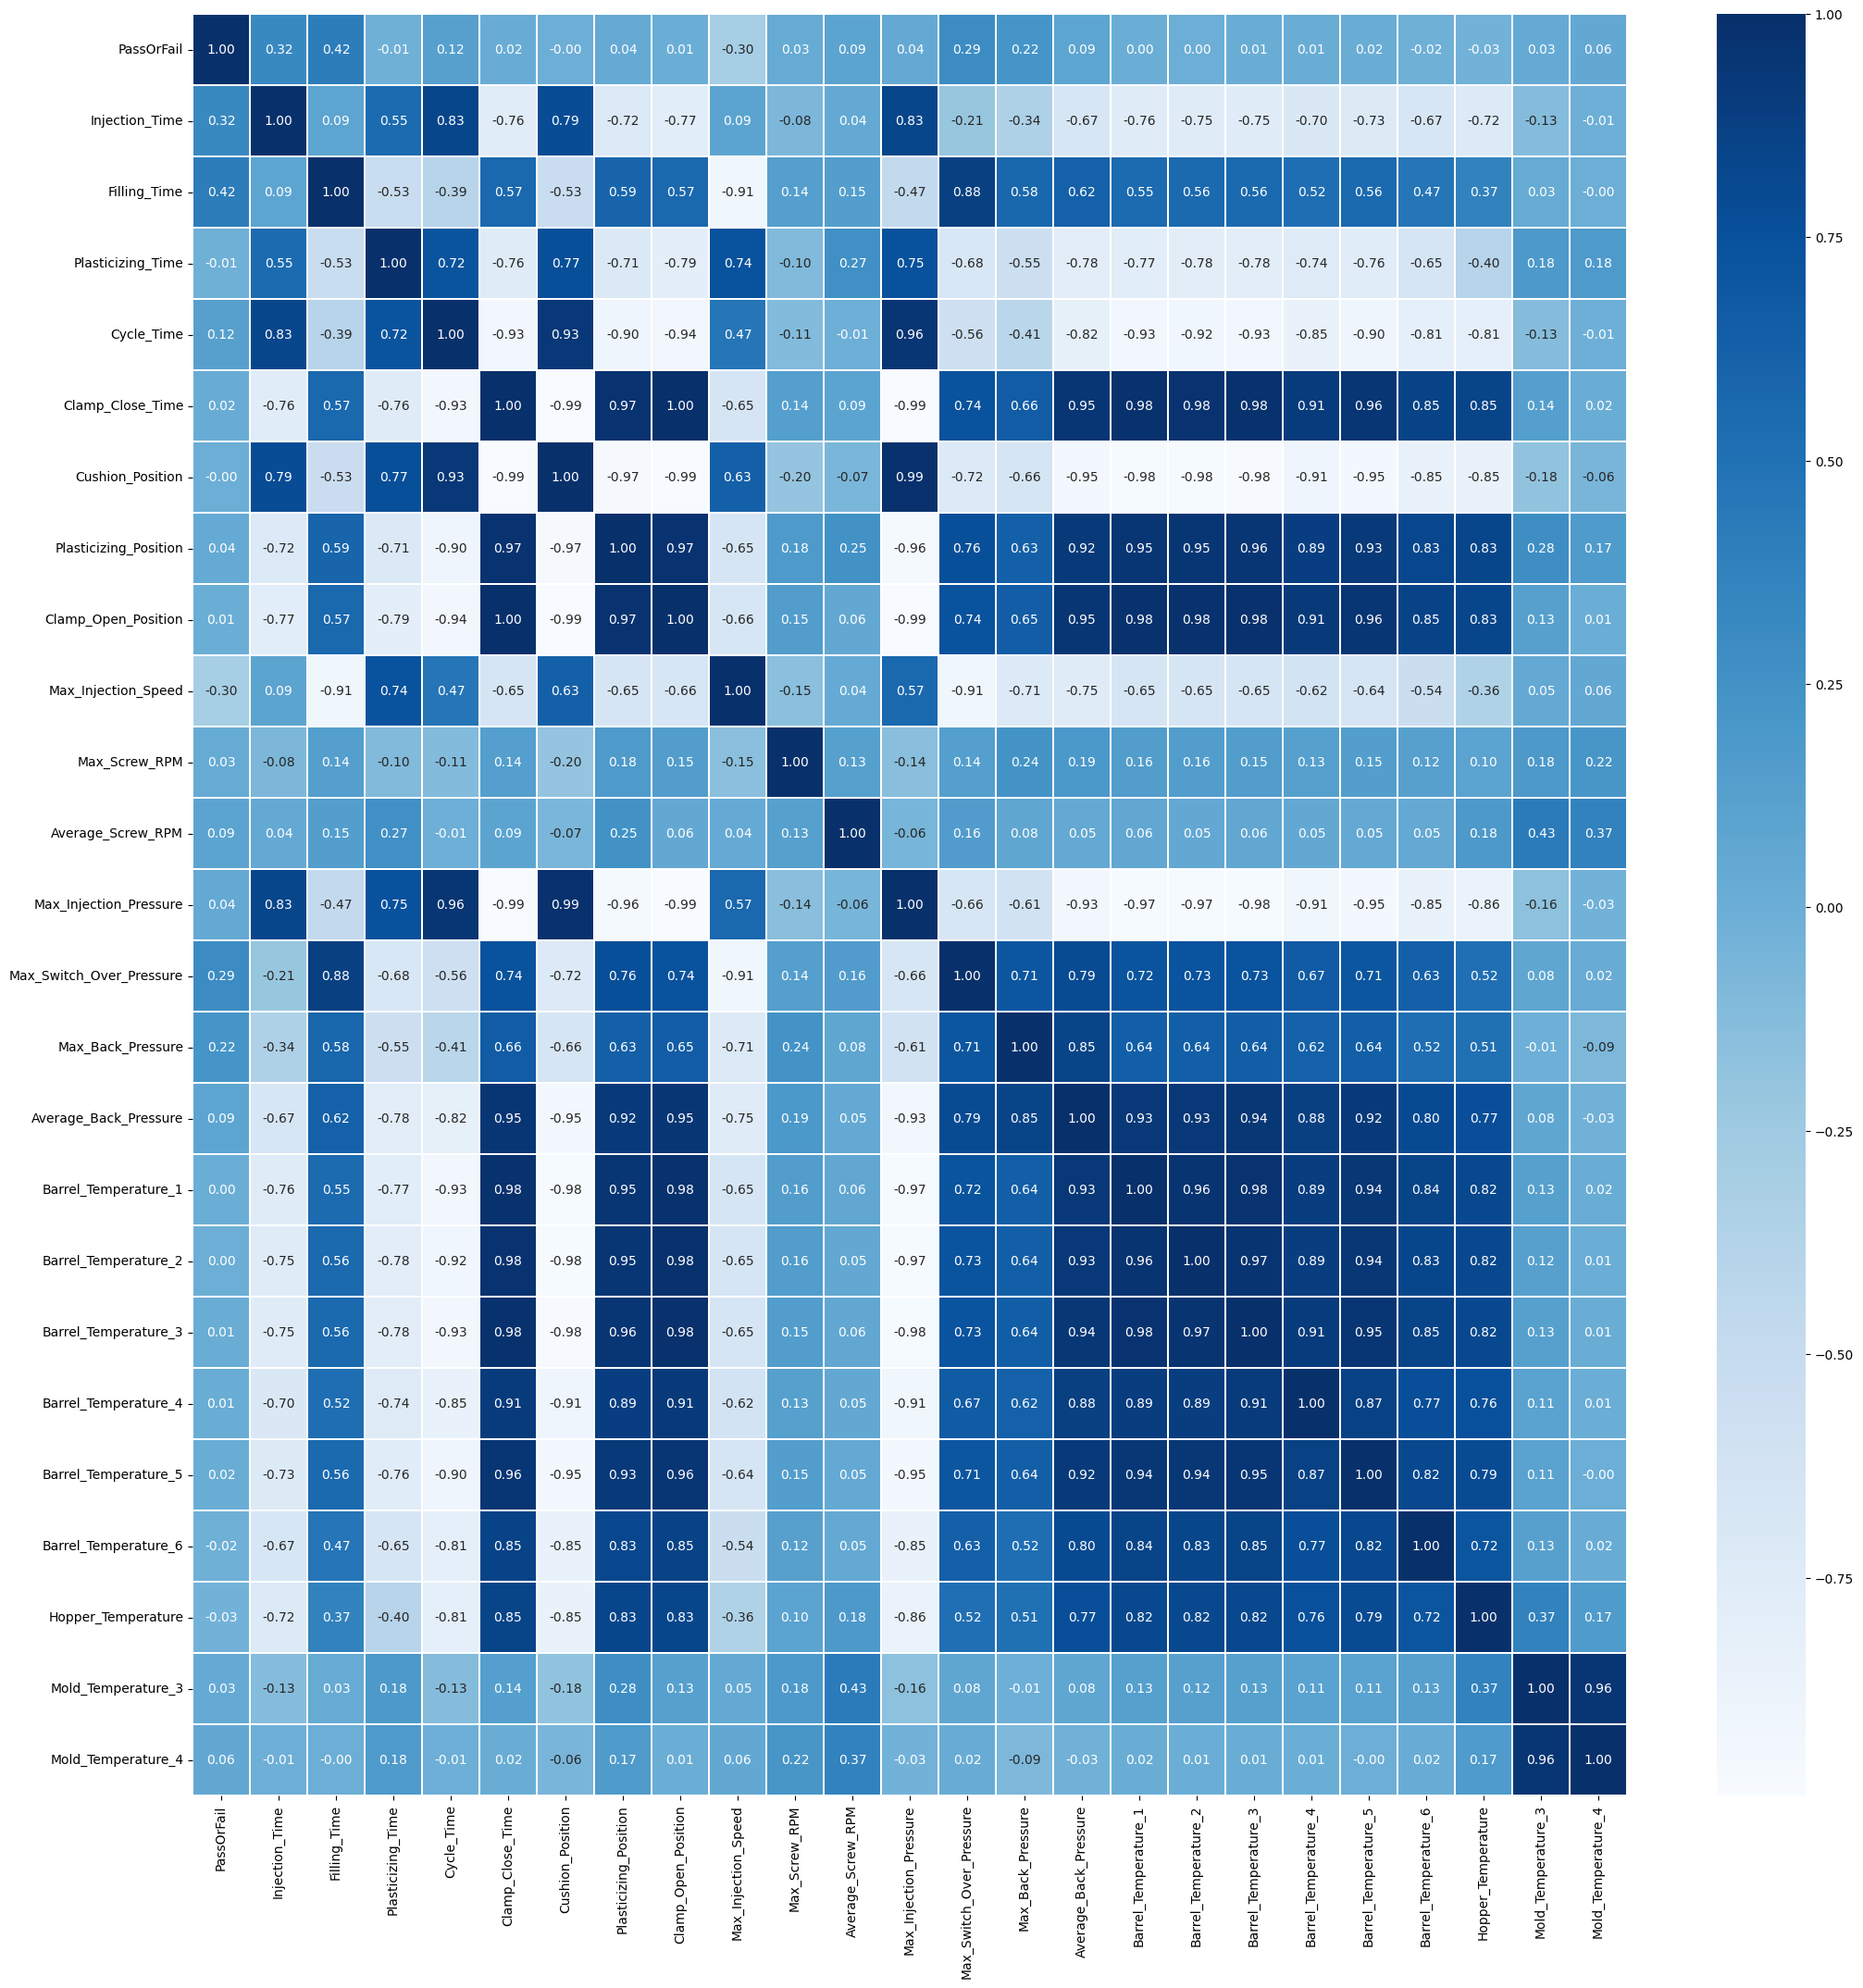

In [152]:
plt.subplots(figsize=(25,25))
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

In [83]:
sns.pairplot(cn7)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026B8BDC8C10> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [153]:
from scipy.stats import spearmanr

In [154]:
cn7_columns_nm = cn7.columns
cn7_columns_nm

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [155]:
y = cn7["PassOrFail"]
y

0       0
1       0
2       0
3       0
4       0
       ..
6731    0
6732    0
6733    0
6734    0
6735    0
Name: PassOrFail, Length: 6736, dtype: int64

In [156]:
spearmanr(cn7[cn7_columns_nm[1]], y)

SignificanceResult(statistic=0.057059662757664865, pvalue=2.7857676148954673e-06)

In [157]:
for i in range(1, len(cn7_columns_nm),1): 
    print(cn7_columns_nm[i])

Injection_Time
Filling_Time
Plasticizing_Time
Cycle_Time
Clamp_Close_Time
Cushion_Position
Plasticizing_Position
Clamp_Open_Position
Max_Injection_Speed
Max_Screw_RPM
Average_Screw_RPM
Max_Injection_Pressure
Max_Switch_Over_Pressure
Max_Back_Pressure
Average_Back_Pressure
Barrel_Temperature_1
Barrel_Temperature_2
Barrel_Temperature_3
Barrel_Temperature_4
Barrel_Temperature_5
Barrel_Temperature_6
Hopper_Temperature
Mold_Temperature_3
Mold_Temperature_4


In [158]:
for col in cn7_columns_nm:
    s, p = spearmanr(cn7[col],y)
    msg = f"""
        독립변수({col})와 종속변수(P/F)의 상관관계 계수는 {s:.3f}이고, p-value의 값은 {p:.3f} 입니다.
    """
    print(msg)


        독립변수(PassOrFail)와 종속변수(P/F)의 상관관계 계수는 1.000이고, p-value의 값은 0.000 입니다.
    

        독립변수(Injection_Time)와 종속변수(P/F)의 상관관계 계수는 0.057이고, p-value의 값은 0.000 입니다.
    

        독립변수(Filling_Time)와 종속변수(P/F)의 상관관계 계수는 0.058이고, p-value의 값은 0.000 입니다.
    

        독립변수(Plasticizing_Time)와 종속변수(P/F)의 상관관계 계수는 -0.009이고, p-value의 값은 0.456 입니다.
    

        독립변수(Cycle_Time)와 종속변수(P/F)의 상관관계 계수는 0.036이고, p-value의 값은 0.004 입니다.
    

        독립변수(Clamp_Close_Time)와 종속변수(P/F)의 상관관계 계수는 0.089이고, p-value의 값은 0.000 입니다.
    

        독립변수(Cushion_Position)와 종속변수(P/F)의 상관관계 계수는 -0.060이고, p-value의 값은 0.000 입니다.
    

        독립변수(Plasticizing_Position)와 종속변수(P/F)의 상관관계 계수는 0.106이고, p-value의 값은 0.000 입니다.
    

        독립변수(Clamp_Open_Position)와 종속변수(P/F)의 상관관계 계수는 0.006이고, p-value의 값은 0.646 입니다.
    

        독립변수(Max_Injection_Speed)와 종속변수(P/F)의 상관관계 계수는 -0.049이고, p-value의 값은 0.000 입니다.
    

        독립변수(Max_Screw_RPM)와 종속변수(P/F)의 상관관계 계수는 0.022이고, p-value의 값은 0.066 입니다.
    

        독립변수(Av

In [159]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int64  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Clamp_Open_Position       6736 non-null   float64
 9   Max_Injection_Speed       6736 non-null   float64
 10  Max_Screw_RPM             6736 non-null   float64
 11  Average_Screw_RPM         6736 non-null   float64
 12  Max_Injection_Pressure    6736 non-null   float64
 13  Max_Switch_Over_Pressure  6736 non-null   float64
 14  Max_Back

In [160]:
cn7.drop(columns=["Plasticizing_Time", "Cycle_Time", "Clamp_Open_Position",
                       "Max_Screw_RPM", "Max_Injection_Pressure", "Max_Back_Pressure", "Average_Back_Pressure",
                       "Barrel_Temperature_1","Barrel_Temperature_2","Barrel_Temperature_3", "Barrel_Temperature_4",
                       "Barrel_Temperature_5", "Barrel_Temperature_6", "Mold_Temperature_3","Mold_Temperature_4"], axis=1, inplace=True)
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int64  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Clamp_Close_Time          6736 non-null   float64
 4   Cushion_Position          6736 non-null   float64
 5   Plasticizing_Position     6736 non-null   float64
 6   Max_Injection_Speed       6736 non-null   float64
 7   Average_Screw_RPM         6736 non-null   float64
 8   Max_Switch_Over_Pressure  6736 non-null   float64
 9   Hopper_Temperature        6736 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 526.4 KB


In [183]:
# 양품
cn7_Y = cn7[cn7["PassOrFail"]==0].copy()
print("CN7의 양품 개수:", len(cn7_Y))
# 불량
cn7_N = cn7[cn7["PassOrFail"]==1].copy()
print("CN7의 불량 개수:", len(cn7_N))
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [186]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_temp.shape, y_temp.shape)

(4041, 9) (4041,) (2695, 9) (2695,)


In [189]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4041, 9) (4041,)
(1347, 9) (1347,)
(1348, 9) (1348,)


In [190]:
X_train

array([[-3.32738485e-01, -3.45211210e-01,  8.38800842e-02, ...,
        -7.59958997e-01,  1.07807121e-01,  3.43896233e-01],
       [ 5.50447103e-02,  1.53804100e-01, -4.79775801e-02, ...,
        -7.59958997e-01, -2.47073913e-02, -4.77931107e-01],
       [-1.11147333e-01, -6.00586334e-02,  8.38800842e-02, ...,
         1.31608824e+00, -5.54725004e-01,  6.31534548e-01],
       ...,
       [ 1.10443819e-01,  2.96380388e-01, -4.79775801e-02, ...,
        -7.59958997e-01,  3.72815928e-01, -6.83387942e-01],
       [ 2.11062253e+01,  2.72433295e+01,  8.38800842e-02, ...,
         1.31529972e+00,  1.34909439e+01, -9.29935517e-01],
       [ 2.21236754e-01,  4.38960076e-01,  8.38800842e-02, ...,
         1.31608824e+00,  6.37824734e-01,  5.62579179e-02]])

In [191]:
scaler.fit(X_train)

StandardScaler()

In [192]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [193]:
print(X_train_scaled.shape, y_train.shape)
print(X_val_scaled.shape, y_val.shape)
print(X_test_scaled.shape, y_test.shape)

(4041, 9) (4041,)
(1347, 9) (1347,)
(1348, 9) (1348,)


In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

grid_df = pd.DataFrame()
# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X, y)
    model = grid_search_model.best_estimator_
    pred = model.predict(X)
    acc = accuracy_score(y, pred)
    pre = precision_score(y, pred)
    rec = recall_score(y, pred)
    f1 = f1_score(y, pred)
    df_temp = pd.DataFrame([[model_name,  acc, pre, rec, f1, str(grid_search_model.best_params_)]],
                             columns=["모델명", "정확도", 
                                      "정밀도", "재현율", "f1-score", "파라미터"])
    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
grid_df

,모델명,정확도,정밀도,재현율,f1-score,파라미터
0,RandomForestClassifier,0.99807,1.000000,0.666667,0.800000,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
1,ExtraTreesClassifier,0.99807,1.000000,0.666667,0.800000,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
2,GradientBoostingClassifier,0.99807,0.770833,0.948718,0.850575,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
3,HistGradientBoostingClassifier,0.99807,0.760000,0.974359,0.853933,"{'max_depth': 10, 'max_iter': 20, 'min_samples..."
4,XGBClassifier,0.99807,0.964286,0.692308,0.805970,"{'max_depth': 10, 'min_child_weight': 2, 'n_es..."


In [182]:
y[y==1]

40      1
48      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
640     1
643     1
644     1
645     1
646     1
2022    1
2025    1
2026    1
2027    1
2028    1
3394    1
3428    1
3429    1
3430    1
4010    1
4013    1
4014    1
4015    1
4016    1
5140    1
5390    1
5393    1
5394    1
5395    1
5396    1
6520    1
Name: PassOrFail, dtype: int64

In [166]:
#손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
#모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2,
                        callbacks=[EarlyStopping(monitor="val_loss",patience=7, mode="min")])


Epoch 1/30
107/107 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.4472 - val_loss: 0.2021 - val_accuracy: 0.1975
Epoch 2/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.5703 - val_loss: 0.2007 - val_accuracy: 0.1975
Epoch 3/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.6066 - val_loss: 0.2007 - val_accuracy: 0.1975
Epoch 4/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1568 - accuracy: 0.6091 - val_loss: 0.1994 - val_accuracy: 0.1975
Epoch 5/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.6069 - val_loss: 0.2007 - val_accuracy: 0.1975
Epoch 6/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.6147 - val_loss: 0.2001 - val_accuracy: 0.1975
Epoch 7/30
107/107 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.6137 - val_loss: 0.1998 - val_accuracy: 0.1975
Epoch 

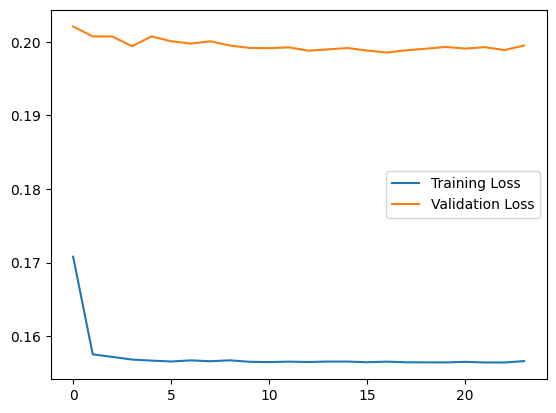

In [167]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

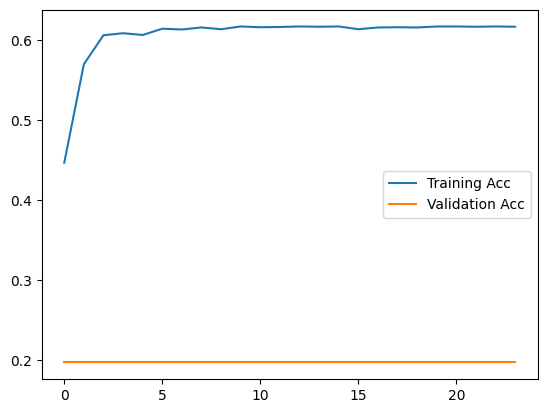

In [168]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()

In [169]:
cn7_train_pred = dropout_AE.predict(cn7_train_Y)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)
threshold = np.mean(cn7_train_loss) + 5*np.std(cn7_train_loss)
print("복원 오류 임계치:", threshold)

복원 오류 임계치: 0.4237607425427137


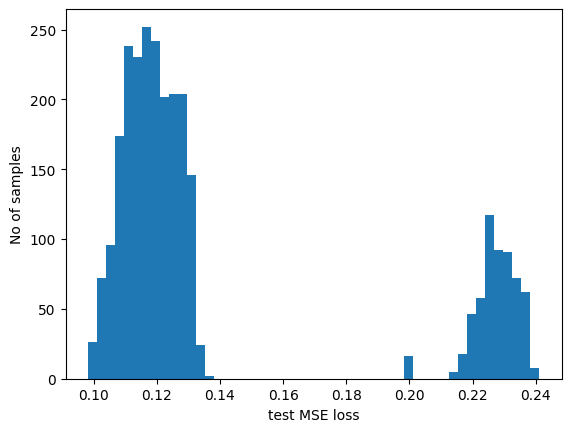

불량 개수: 0


In [170]:
# 예측값
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

# 양품 평가 데이터의 복원 오차(예측값-실제값)
cn7_test_Y_mse = np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()

# 불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수:", np.sum(cv7_test_Y_anomalies))

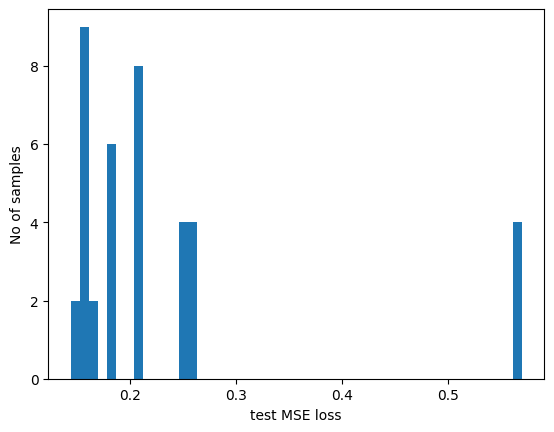

불량 개수: 4


In [171]:
# 예측값
cn7_predict_N = dropout_AE.predict(cn7_test_N)

# 양품 평가 데이터의 복원 오차(예측값-실제값)
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()

# 불량으로 판단한 데이터 확인
cv7_test_N_anomalies = cn7_test_N_mse > threshold
print("불량 개수:", np.sum(cv7_test_N_anomalies))

In [172]:
cn7_true = np.concatenate([np.zeros(len(cv7_test_Y_anomalies)), np.ones(len(cv7_test_N_anomalies))])

In [173]:
cn7_prediction = np.concatenate([cv7_test_Y_anomalies, cv7_test_N_anomalies])

In [174]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cn7_true, cn7_prediction)

array([[2697,    0],
       [  35,    4]], dtype=int64)

In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:", f1_score(cn7_true, cn7_prediction))

정확도: 0.9872076023391813
정밀도: 1.0
재현율: 0.10256410256410256
F1: 0.18604651162790697
